<a href="https://colab.research.google.com/github/Ikenna1011/ai590-capstone-project/blob/main/IOpurum_AAI_590_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Improt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Import the dataset
df = pd.read_csv('SMS SITE 002, RIG-2_1min.csv')
df.head()

,Time & Date,Primary Choke Size 64ths,WHP SMS PSIG,WHT SMS/ECS (F),DSDP/SFP PSIG,DSFP/UCP PSIG,UCT (F),DCP PSIG,DCT/ECSDT (F),Gas Static Pressure PSIG,Gas Temp (F),Gas Diff Press Inches H20,Sep1 BS&W %,Sep1 Gas Orifice Size Inches,Oil Temperature (F),BS&W at choke %,Sep1 Gas CO2 %,Sep1 Gas H2S ppm,Water Ph <none>,Chlorides PPM ppm,Sep1 Gas SG <none>,Sep1 Corr Oil SG API,Gas Flow MMSCF/Day,Oil Flow Bbls/Day,Water Flow Bbls/Day,TCA PSIG,CCA 9*13 PSIG,CCA 13*18 PSIG,Unnamed: 28,Unnamed: 29
0,30/09/2018 23:00,14,4974.52,87.25,5002.40,0.0,82.55,0.0,72.44,3.74,83.18,2.30,0%,0.0,82.51,100,2.00%,18000,7,7273,0.765,0.0,0.0,0.0,0.000000,280.06,0.0,0.0,NaN,NaN
1,30/09/2018 23:01,14,4370.19,87.31,4392.68,0.0,82.63,0.0,72.31,4.58,83.07,2.21,100%,0.0,82.51,100,2.00%,18000,7,7273,0.765,47.2,0.0,0.0,0.000000,280.06,0.0,0.0,NaN,NaN
2,30/09/2018 23:02,14,3790.75,87.19,3809.68,0.0,82.47,0.0,72.38,3.59,83.08,2.26,100%,0.0,82.46,100,2.00%,18000,7,7273,0.765,47.2,0.0,0.0,0.601504,279.68,0.0,0.0,NaN,NaN
3,30/09/2018 23:03,14,3239.16,87.14,3253.22,0.0,82.43,0.0,72.41,3.43,83.05,2.21,100%,0.0,82.52,100,2.00%,18000,7,7273,0.765,47.2,0.0,0.0,0.601504,275.48,0.0,0.0,NaN,NaN
4,30/09/2018 23:04,14,2700.54,87.09,2711.94,0.0,82.17,0.0,73.69,3.43,83.00,2.17,100%,0.0,82.44,100,2.00%,18000,7,7273,0.765,47.2,0.0,0.0,1.203010,273.76,0.0,0.0,NaN,NaN


In [ ]:
df.shape

(43506, 30)

In [ ]:
# Descriptive statistics of the dataset
df.describe()

,Primary Choke Size 64ths,WHP SMS PSIG,WHT SMS/ECS (F),DSDP/SFP PSIG,DSFP/UCP PSIG,UCT (F),DCP PSIG,DCT/ECSDT (F),Gas Static Pressure PSIG,Gas Temp (F),Gas Diff Press Inches H20,Sep1 Gas Orifice Size Inches,Oil Temperature (F),Sep1 Gas H2S ppm,Water Ph <none>,Chlorides PPM ppm,Sep1 Gas SG <none>,Sep1 Corr Oil SG API,Gas Flow MMSCF/Day,Oil Flow Bbls/Day,Water Flow Bbls/Day,TCA PSIG,CCA 9*13 PSIG,CCA 13*18 PSIG,Unnamed: 28,Unnamed: 29
count,43506.000000,43506.000000,43506.000000,43506.000000,43506.000000,43506.000000,43506.000000,43506.000000,43506.000000,43506.000000,43506.000000,43506.000000,43506.000000,43506.000000,43506.0,43506.000000,43506.000000,43506.000000,43506.000000,43506.00000,43506.000000,43506.000000,43506.000000,43506.000000,31566.000000,31566.000000
mean,25.382752,5306.423454,172.386299,5269.357442,5236.758323,163.329206,299.466683,155.980157,270.571497,151.991615,207.822304,1.116708,147.419390,25201.903186,7.0,18441.968648,0.842997,34.394010,0.750454,49.69798,1881.263743,2663.825806,2827.181214,65.764612,928.593937,0.126389
std,2.265355,1040.102956,24.953942,1041.397246,1042.601846,31.355932,80.343539,18.048222,73.706445,17.715722,82.133370,0.441362,22.006197,12710.580883,0.0,4684.474692,0.046229,13.051436,0.276152,119.86448,3607.542210,1706.140898,2162.593524,115.068998,167.471917,2.835688
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.290000,0.000000,0.000000,0.000000,15000.000000,7.0,7273.000000,0.765000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,4860.950000,170.152500,4804.730000,4801.767500,158.140000,257.857500,150.462500,238.137500,150.240000,181.600000,0.750000,142.710000,15000.000000,7.0,13333.000000,0.820000,35.000000,0.637409,0.98500,2.004081,670.137500,1124.040000,0.000000,863.170000,0.000000
50%,26.000000,5641.260000,176.740000,5597.970000,5575.650000,167.900000,330.810000,159.280000,296.560000,155.800000,229.900000,1.250000,150.665000,20000.000000,7.0,18182.000000,0.858000,38.100000,0.890000,0.98500,3.219069,3118.785000,1993.400000,0.000000,934.610000,0.000000
75%,26.000000,5904.480000,181.100000,5868.140000,5832.380000,176.410000,356.910000,167.260000,319.830000,160.770000,270.685000,1.500000,157.690000,35000.000000,7.0,24242.000000,0.889000,38.700000,0.900000,1.00000,3.361050,4413.232500,3944.585000,96.030000,1028.460000,0.000000
max,26.000000,6574.920000,193.620000,8638.710000,6567.290000,274.360000,422.400000,178.460000,386.280000,204.990000,400.000000,1.500000,188.370000,50000.000000,7.0,26667.000000,1.100000,47.200000,1.000000,2797.56000,48062.500000,11582.900000,8810.410000,445.010000,1297.310000,151.450000


In [ ]:
# Get the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43506 entries, 0 to 43505
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Time & Date                   43506 non-null  object 
 1   Primary Choke Size 64ths      43506 non-null  int64  
 2   WHP SMS PSIG                  43506 non-null  float64
 3   WHT  SMS/ECS (F)              43506 non-null  float64
 4   DSDP/SFP PSIG                 43506 non-null  float64
 5   DSFP/UCP PSIG                 43506 non-null  float64
 6   UCT (F)                       43506 non-null  float64
 7   DCP PSIG                      43506 non-null  float64
 8   DCT/ECSDT (F)                 43506 non-null  float64
 9   Gas Static Pressure PSIG      43506 non-null  float64
 10  Gas Temp (F)                  43506 non-null  float64
 11  Gas Diff Press Inches H20     43506 non-null  float64
 12  Sep1 BS&W %                   43506 non-null  object 
 13  S

## Data Cleaning

In [ ]:
# Convert columns to numeric and removing the '%' sign
df['Sep1 BS&W %'] = pd.to_numeric(df['Sep1 BS&W %'].str.replace('%', ''))
df['BS&W at choke %'] = df['BS&W at choke %'].astype(str)
df['BS&W at choke %'] = pd.to_numeric(df['BS&W at choke %'].str.replace('%', ''))
df['Sep1 Gas CO2 %'] = pd.to_numeric(df['Sep1 Gas CO2 %'].str.replace('%', ''))

# Sort the data
df = df.sort_values('Time & Date')

# Converting to datetime format
df['Time & Date'] = pd.to_datetime(df['Time & Date'], format="%d/%m/%Y %H:%M", errors='coerce')

# Creating new columns
df['Year'] = pd.to_numeric(df['Time & Date'].dt.year, errors='coerce').astype('Int64')
df['Month'] = pd.to_numeric(df['Time & Date'].dt.month, errors='coerce').astype('Int64')
df['Day'] = pd.to_numeric(df['Time & Date'].dt.day, errors='coerce').astype('Int64')
df['Hour'] = pd.to_numeric(df['Time & Date'].dt.hour, errors='coerce').astype('Int64')
df['Minute'] = pd.to_numeric(df['Time & Date'].dt.minute, errors='coerce').astype('Int64')

# Fixing the NaN values
df['Year'] = df['Year'].fillna(method='ffill')
df['Month'] = df['Month'].fillna(method='ffill')
df['Day'] = df['Day'].fillna(method='ffill')
df['Hour'] = df['Hour'].fillna(method='ffill')
df['Minute'] = df['Minute'].fillna(method='ffill')

# Drop the 'Time & Date' column
df.drop('Time & Date', axis=1, inplace=True)

# Rearranging the columns in the dataset
df = df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Primary Choke Size 64ths', 'WHP SMS PSIG',
         'WHT  SMS/ECS (F)', 'DSDP/SFP PSIG', 'DSFP/UCP PSIG', 'UCT (F)', 'DCP PSIG', 'DCT/ECSDT (F)',
         'Gas Static Pressure PSIG', 'Gas Temp (F)', 'Gas Diff Press Inches H20', 'Sep1 BS&W %',
         'Sep1 Gas Orifice Size Inches', 'Oil Temperature (F)', 'BS&W at choke %', 'Sep1 Gas CO2 %', 'Sep1 Gas H2S ppm',
       'Water Ph <none>', 'Chlorides PPM ppm', 'Sep1 Gas SG <none>', 'Sep1 Corr Oil SG API', 'Gas Flow MMSCF/Day',
       'Oil Flow Bbls/Day', 'Water Flow Bbls/Day', 'TCA PSIG', 'CCA 9*13 PSIG', 'CCA 13*18 PSIG', 'Unnamed: 28',
       'Unnamed: 29']]

# Checking the first 5 rows of the dataset
df.head()

,Year,Month,Day,Hour,Minute,Primary Choke Size 64ths,WHP SMS PSIG,WHT SMS/ECS (F),DSDP/SFP PSIG,DSFP/UCP PSIG,UCT (F),DCP PSIG,DCT/ECSDT (F),Gas Static Pressure PSIG,Gas Temp (F),Gas Diff Press Inches H20,Sep1 BS&W %,Sep1 Gas Orifice Size Inches,Oil Temperature (F),BS&W at choke %,Sep1 Gas CO2 %,Sep1 Gas H2S ppm,Water Ph <none>,Chlorides PPM ppm,Sep1 Gas SG <none>,Sep1 Corr Oil SG API,Gas Flow MMSCF/Day,Oil Flow Bbls/Day,Water Flow Bbls/Day,TCA PSIG,CCA 9*13 PSIG,CCA 13*18 PSIG,Unnamed: 28,Unnamed: 29
60,2018,10,1,0,0,14,232.86,140.70,239.20,3.05,80.44,0.0,119.73,5.11,81.71,2.29,100.0,0.0,82.51,100,1.0,15000,7,12121,0.765,47.2,0.0,0.0,0.0,2325.65,13.02,0.0,NaN,NaN
61,2018,10,1,0,1,14,229.93,140.59,235.16,1.91,80.47,0.0,119.63,5.04,81.39,2.32,100.0,0.0,82.56,100,1.0,15000,7,12121,0.765,47.2,0.0,0.0,0.0,2335.58,12.67,0.0,NaN,NaN
62,2018,10,1,0,2,14,227.78,140.63,235.74,3.43,80.27,0.0,119.78,6.10,81.24,2.25,100.0,0.0,82.51,100,1.0,15000,7,12121,0.765,47.2,0.0,0.0,0.0,2341.12,13.80,0.0,NaN,NaN
63,2018,10,1,0,3,14,224.85,140.31,228.43,0.57,80.38,0.0,119.83,6.33,81.32,2.25,100.0,0.0,82.48,100,1.0,15000,7,12121,0.765,47.2,0.0,0.0,0.0,2351.23,13.80,0.0,NaN,NaN
64,2018,10,1,0,4,14,217.05,139.97,232.08,2.10,80.25,0.0,119.69,4.96,81.42,2.26,100.0,0.0,82.51,100,1.0,15000,7,12121,0.765,47.2,0.0,0.0,0.0,2354.67,12.15,0.0,NaN,NaN


In [ ]:
# Displaying the total number of missing values
missing_values = df.isnull().sum()
percentage_missing = (missing_values / len(df)) * 100
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})
print(missing_data_summary)


                              Missing Values  Percentage Missing
Year                                       0             0.00000
Month                                      0             0.00000
Day                                        0             0.00000
Hour                                       0             0.00000
Minute                                     0             0.00000
Primary Choke Size 64ths                   0             0.00000
WHP SMS PSIG                               0             0.00000
WHT  SMS/ECS (F)                           0             0.00000
DSDP/SFP PSIG                              0             0.00000
DSFP/UCP PSIG                              0             0.00000
UCT (F)                                    0             0.00000
DCP PSIG                                   0             0.00000
DCT/ECSDT (F)                              0             0.00000
Gas Static Pressure PSIG                   0             0.00000
Gas Temp (F)             

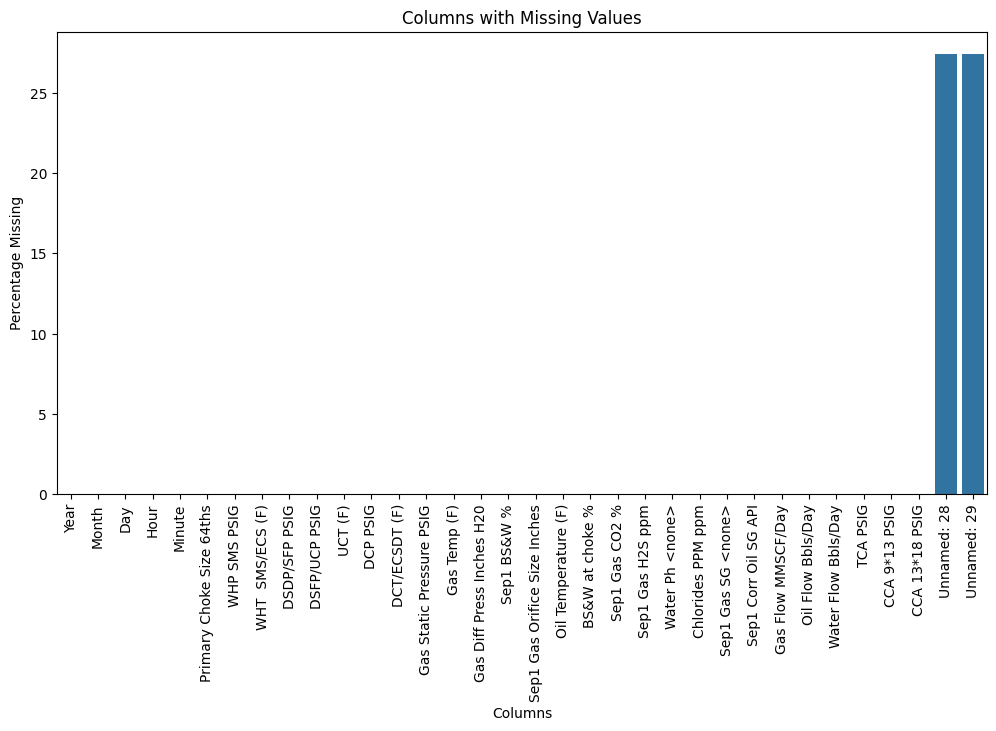

In [ ]:
# Visualize columns with missing values
plt.figure(figsize=(12, 6))
plt.title('Columns with Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=90)
sns.barplot(x=missing_data_summary.index, y='Percentage Missing', data=missing_data_summary)
plt.show()


In [ ]:
# Droped columns
df.drop('Unnamed: 28', axis=1, inplace=True)
df.drop('Unnamed: 29', axis=1, inplace=True)

In [ ]:
# Removing special characters, lower case
df.columns = (
    df.columns
    .str.lower()
    .str.replace(r'[^a-zA-Z0-9]', '_', regex=True)
    .str.replace(r'_{2,}', '_', regex=True)
)
df.columns = [col.strip('_') for col in df.columns]
print(df)

       year  month  day  hour  minute  primary_choke_size_64ths  whp_sms_psig  \
60     2018     10    1     0       0                        14        232.86   
61     2018     10    1     0       1                        14        229.93   
62     2018     10    1     0       2                        14        227.78   
63     2018     10    1     0       3                        14        224.85   
64     2018     10    1     0       4                        14        217.05   
...     ...    ...  ...   ...     ...                       ...           ...   
12174  2018     10    9     9      55                        26       5862.90   
12175  2018     10    9     9      56                        26       5860.23   
12176  2018     10    9     9      57                        26       5861.75   
12177  2018     10    9     9      58                        26       5863.28   
12178  2018     10    9     9      59                        26       5862.52   

       wht_sms_ecs_f  dsdp_

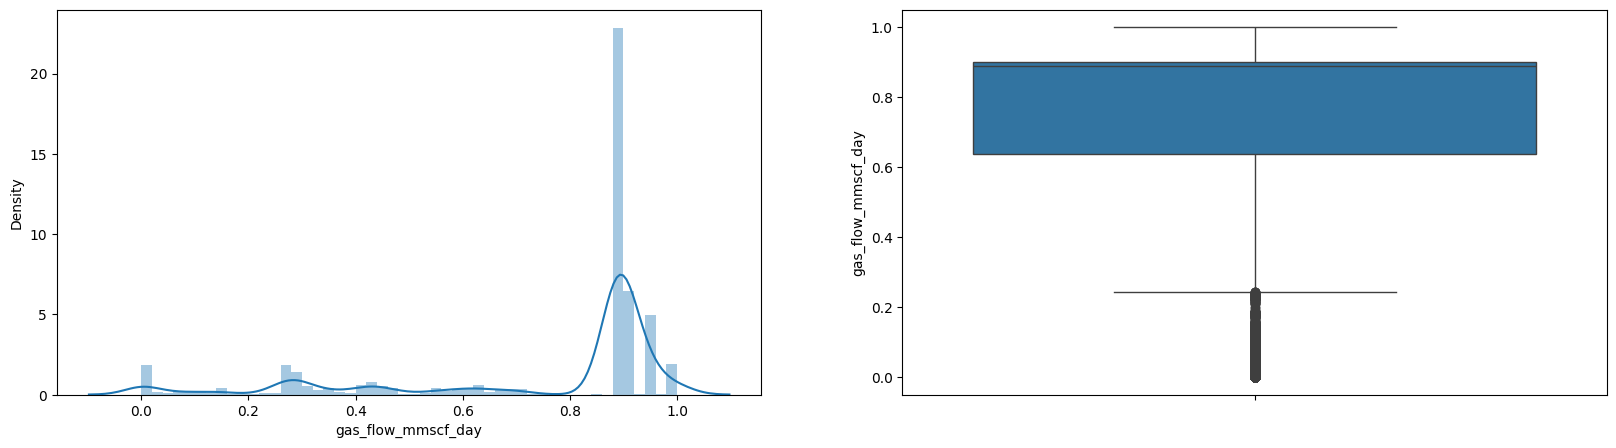

In [ ]:
# Data distribution plot
def  plot_dist(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    sns.distplot(df[col], ax=ax[0])
    sns.boxplot(df[col], ax=ax[1])
    plt.show()
plt.show()
plot_dist(df, 'gas_flow_mmscf_day')

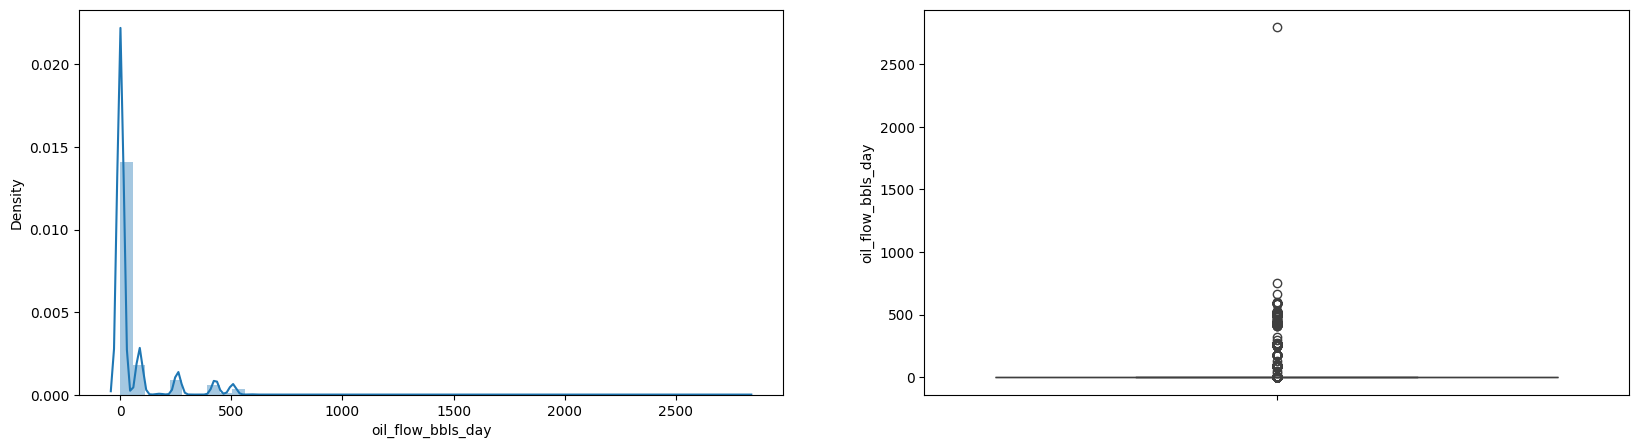

In [ ]:
plot_dist(df, 'oil_flow_bbls_day')

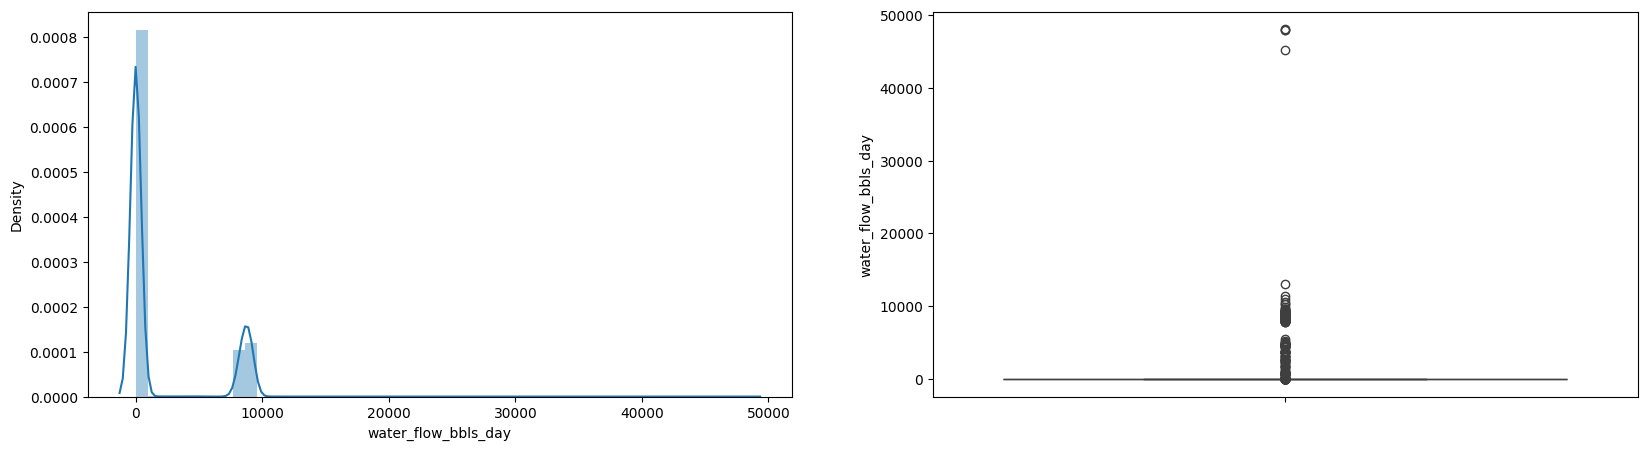

In [ ]:
plot_dist(df, 'water_flow_bbls_day')

In [ ]:
# Dropping columns with zero variance is shown in the heatmap
df.drop('water_ph_none', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

In [ ]:
# Rmoving outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df
df = remove_outliers(df, 'gas_flow_mmscf_day')
df = remove_outliers(df, 'oil_flow_bbls_day')
df = remove_outliers(df, 'water_flow_bbls_day')
df.shape

(31566, 30)

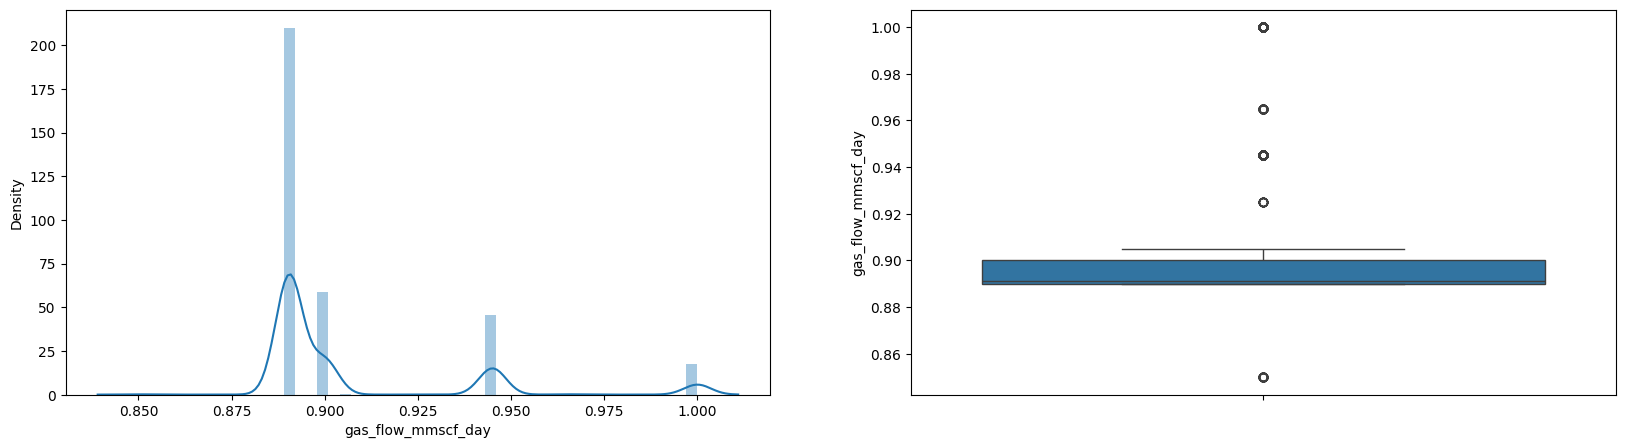

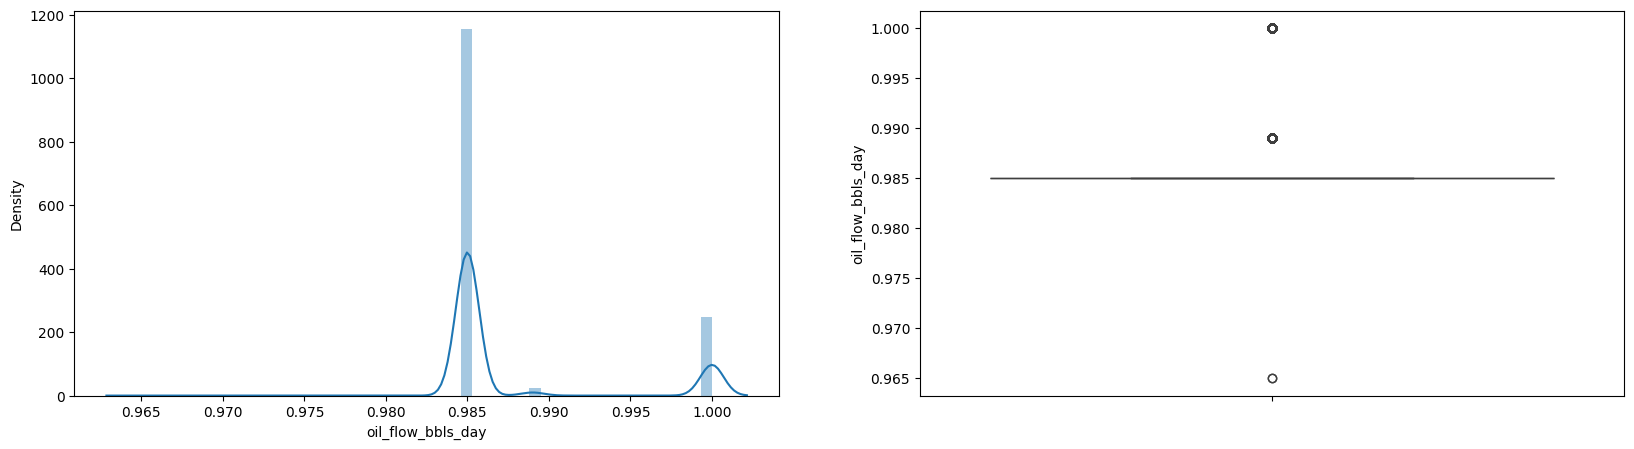

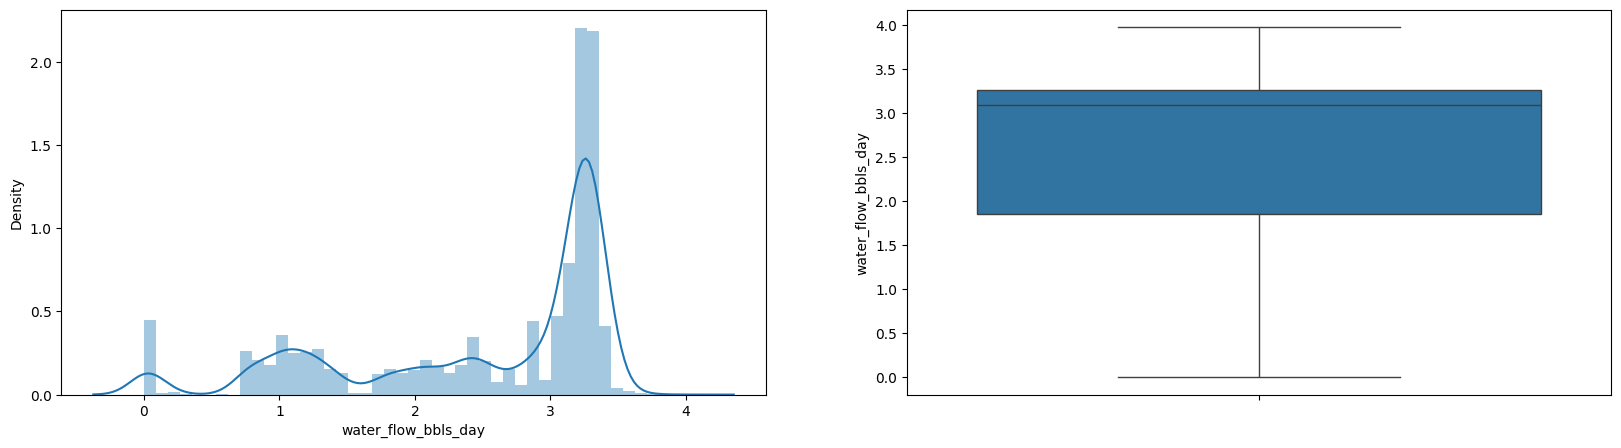

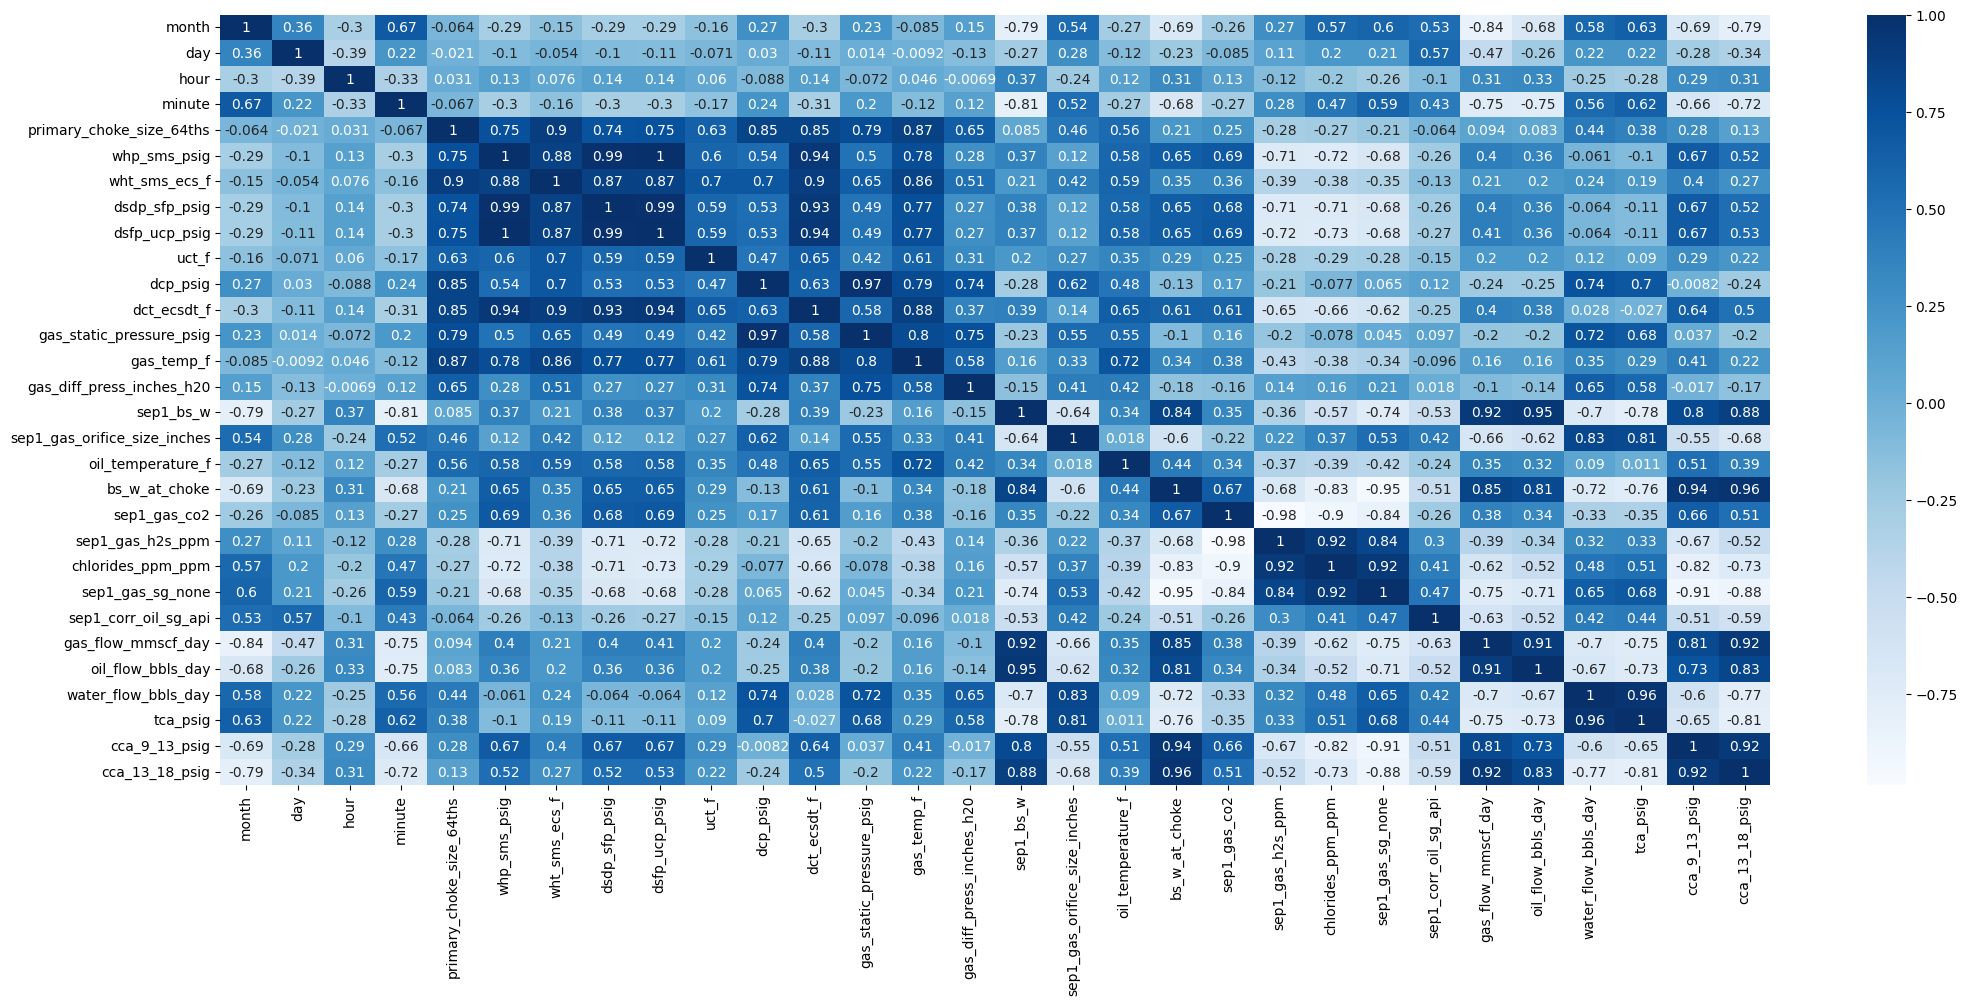

In [ ]:
# Distribution plot after removing outliers
plot_dist(df, 'gas_flow_mmscf_day')
plot_dist(df, 'oil_flow_bbls_day')
plot_dist(df, 'water_flow_bbls_day')

# Create a heatmap
corr_matrix = df.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

## PCA

In [ ]:
df.drop('month', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)
df.drop('hour', axis=1, inplace=True)
df.drop('minute', axis=1, inplace=True)

# Normalize data
df_norm = (df - df.mean()) / df.std()

# Create a PCA object
n_components = 5
pca = PCA(n_components=n_components)
pca.fit(df_norm)

# Transform the dataset
df_pca = pca.transform(df_norm)
print(df_pca.shape)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca.head()

(31566, 5)


,PC1,PC2,PC3,PC4,PC5
0,-6.130723,3.268260,-1.727955,-0.458207,-0.718142
1,-6.132513,3.278952,-1.721107,-0.440765,-0.715651
2,-6.132494,3.258572,-1.733866,-0.458723,-0.715530
3,-6.137360,3.265347,-1.734493,-0.453168,-0.712632
4,-6.128487,3.258871,-1.733703,-0.451559,-0.707339


## Model Design, Building, Optimization and Analysis

In [ ]:
X = df_pca
y = df[['gas_flow_mmscf_day', 'oil_flow_bbls_day', 'water_flow_bbls_day']]
y.head()

# Split the data
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=0)

# Check the shape of the training, validation and test sets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

# Train and evaluate the models
def train_and_evaluate(model):
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    mae = np.mean(abs(predictions - y_val))

    # Performance metrics
    print('Performance Metrics for {}'.format(model.__class__.__name__))
    print('Mean Absolute Error: {:.4}'.format(mae))
    print('Root Mean Squared Error: {:.4}'.format(np.sqrt(np.mean((predictions - y_val) ** 2))))
    print('\n')

    # Return the performance metric
    return mae

# Train MLP model and evaluate its performance
mlp = MLPRegressor(random_state=0)
mlp_mae = train_and_evaluate(mlp)


(22096, 5)
(4735, 5)
(4735, 5)
(22096, 3)
(4735, 3)
(4735, 3)


Performance Metrics for MLPRegressor
Mean Absolute Error: 0.02044
Root Mean Squared Error: 0.04547




Performance Metrics for MLPRegressor
Mean Absolute Error: 0.0205
Root Mean Squared Error: 0.04477




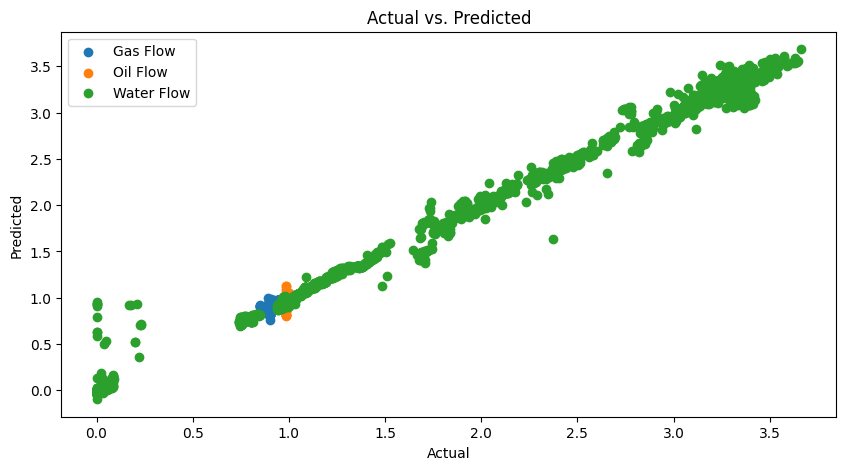

In [ ]:
# Making predictions on the test set
predictions = mlp.predict(X_test)
mae = np.mean(abs(predictions - y_test))
print('Performance Metrics for {}'.format(mlp.__class__.__name__))
print('Mean Absolute Error: {:.4}'.format(mae))
print('Root Mean Squared Error: {:.4}'.format(np.sqrt(np.mean((predictions - y_test) ** 2))))
print('\n')

# Plotting the actual values against the predicted values
plt.figure(figsize=(10, 5))
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(y_test['gas_flow_mmscf_day'], predictions[:, 0])
plt.scatter(y_test['oil_flow_bbls_day'], predictions[:, 1])
plt.scatter(y_test['water_flow_bbls_day'], predictions[:, 2])
plt.legend(['Gas Flow', 'Oil Flow', 'Water Flow'])
plt.show()

In [ ]:
# Training and evaluating the RF model
rf = RandomForestRegressor(random_state=0)
rf_mae = train_and_evaluate(rf)

Performance Metrics for RandomForestRegressor
Mean Absolute Error: 0.002714
Root Mean Squared Error: 0.01496




In [ ]:
# Make predictions on the test set
predictions = rf.predict(X_test)
# Mean absolute error (MAE)
mae = np.mean(abs(predictions - y_test))
# Display the performance metrics
print('Performance Metrics for {}'.format(rf.__class__.__name__))
print('Mean Absolute Error: {:.4}'.format(mae))
print('Root Mean Squared Error: {:.4}'.format(np.sqrt(np.mean((predictions - y_test) ** 2))))
print('\n')

Performance Metrics for RandomForestRegressor
Mean Absolute Error: 0.00261
Root Mean Squared Error: 0.01517




,gas_flow_mmscf_day,oil_flow_bbls_day,water_flow_bbls_day,Actual Gas Flow MMSCF/Day,Actual Oil Flow Bbls/Day,Actual Water Flow Bbls/Day
0,0.900,0.985,2.162688,0.900,0.985,2.163546
1,0.945,1.000,1.260418,0.945,1.000,1.261016
2,0.900,0.985,2.071318,0.900,0.985,2.081634
3,0.891,0.985,2.864244,0.891,0.985,2.854592
4,1.000,1.000,0.949450,1.000,1.000,0.950268




Epoch 1/100


691/691 [==============================] - 6s 6ms/step - loss: 0.1333 - mae: 0.1333 - val_loss: 0.0393 - val_mae: 0.0393
Epoch 2/100
691/691 [==============================] - 4s 6ms/step - loss: 0.0637 - mae: 0.0637 - val_loss: 0.0538 - val_mae: 0.0538
Epoch 3/100
691/691 [==============================] - 5s 7ms/step - loss: 0.0536 - mae: 0.0536 - val_loss: 0.0287 - val_mae: 0.0287
Epoch 4/100
691/691 [==============================] - 5s 7ms/step - loss: 0.0479 - mae: 0.0479 - val_loss: 0.0289 - val_mae: 0.0289
Epoch 5/100
691/691 [==============================] - 5s 7ms/step - loss: 0.0446 - mae: 0.0446 - val_loss: 0.0206 - val_mae: 0.0206
Epoch 6/100
691/691 [==============================] - 5s 8ms/step - loss: 0.0416 - mae: 0.0416 - val_loss: 0.0209 - val_mae: 0.0209
Epoch 7/100
691/691 [==============================] - 4s 6ms/step - loss: 0.0395 - mae: 0.0395 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 8/100
691/691 [==============================] - 4s 6ms/ste

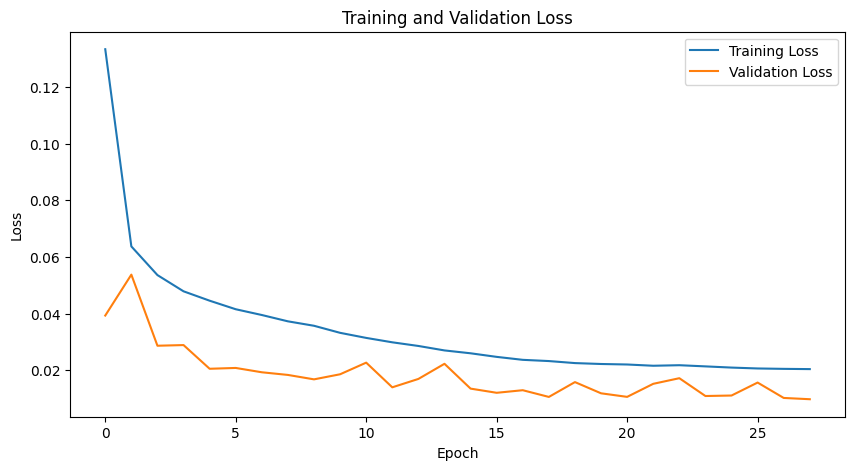

In [ ]:
# Neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3)
])

learning_rate = 0.001
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='mae',
    metrics=['mae'])
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping])

In [ ]:
# Model Evaluation
# Test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test MAE: {}'.format(test_mae))
# Validation set
val_loss, val_mae = model.evaluate(X_val, y_val)
print('Validation Loss: {}'.format(val_loss))
print('Validation MAE: {}'.format(val_mae))

148/148 [==============================] - 1s 5ms/step - loss: 0.0105 - mae: 0.0105
Test Loss: 0.010490222834050655
Test MAE: 0.010490222834050655
148/148 [==============================] - 1s 4ms/step - loss: 0.0106 - mae: 0.0106
Validation Loss: 0.010635622777044773
Validation MAE: 0.010635622777044773
